In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import graphviz

%matplotlib inline

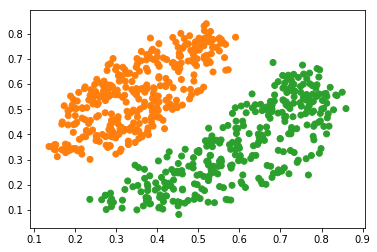

In [11]:
data = pd.read_csv('two_class_data.csv', header=0)

x = data['x']
y = data['y']
c = data['class']

plt.scatter(x, y, c=c)

/home/wjmr/.pyenv/versions/3.5.4/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.990196078431


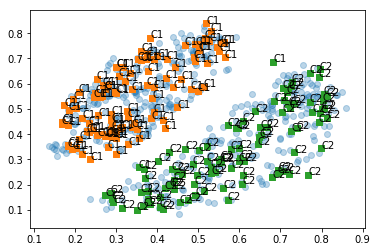

In [17]:
data = pd.read_csv('two_class_data.csv', header=0)

feature = data[['x', 'y']].values
target = data['class'].values

x_train, x_test, y_train, y_test = train_test_split(feature, target, 
              test_size =0.3, random_state=50)
model = Perceptron()
model.fit(x_train, y_train)
results = model.predict(x_test)
plt.scatter(x_train[:, 0], x_train[:, 1], alpha=0.3)
plt.scatter(x_test[:, 0], x_test[:, 1], marker=',', c=y_test)
for i, txt in enumerate(results):
    plt.annotate(txt, (x_test[:, 0][i], x_test[:, 1][i]))
print(model.score(x_test, y_test))

1.0


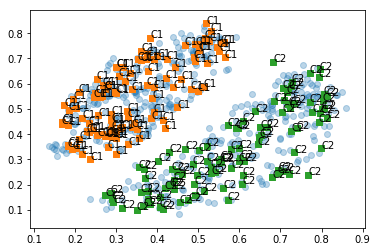

In [18]:
data = pd.read_csv('two_class_data.csv', header=0)

feature = data[['x', 'y']].values
target = data['class'].values

x_train, x_test, y_train, y_test = train_test_split(feature, target, 
              test_size =0.3, random_state=50)
model = SVC()
model.fit(x_train, y_train)
results = model.predict(x_test)
plt.scatter(x_train[:, 0], x_train[:, 1], alpha=0.3)
plt.scatter(x_test[:, 0], x_test[:, 1], marker=',', c=y_test)
for i, txt in enumerate(results):
    plt.annotate(txt, (x_test[:, 0][i], x_test[:, 1][i]))
print(model.score(x_test, y_test))

In [22]:
data = pd.read_csv('zoo.csv', header=0)
feature = data.iloc[:, 1:17].values
target = data['type'].values

x_train, x_test, y_train, y_test = train_test_split(feature, target, 
                test_size=0.3, random_state=50)
model = SVC()
model.fit(x_train, y_train)

results = model.predict(x_test)
print(model.score(x_test, y_test))

0.866666666667


0.833333333333


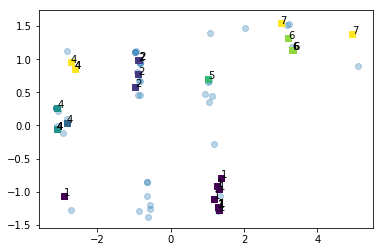

In [28]:
data = pd.read_csv('zoo.csv', header=0)
feature = data.iloc[:, 1:17].values
target = data['type'].values

pca = PCA(n_components=2)
feature_pca = pca.fit_transform(feature)

x_train, x_test, y_train, y_test = train_test_split(feature_pca,
        target, test_size=0.3, random_state=50)
model = SVC()
model.fit(x_train, y_train)

plt.scatter(x_train[:, 0], x_train[:, 1], alpha=0.3)
plt.scatter(x_test[:, 0], x_test[:, 1], marker=',', c=y_test)
for i, txt in enumerate(results):
    plt.annotate(txt, (x_test[:, 0][i], x_test[:, 1][i]))
print(model.score(x_test, y_test))

1.0


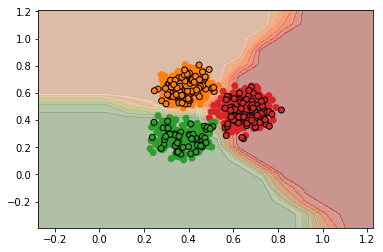

In [36]:
data = pd.read_csv('three_class_data.csv', header=0)
feature = data[['x', 'y']].values
target = data['class'].values

x_train, x_test, y_train, y_test = train_test_split(
    feature, target, test_size=0.3, random_state=50)
model = KNeighborsClassifier()
model.fit(x_train, y_train)
results = model.predict(x_test)
print(model.score(x_test, y_test))

cm0 = plt.cm.Oranges
cm1 = plt.cm.Greens
cm2 = plt.cm.Reds
cm_color = ListedColormap(['red', 'yellow'])

x_min, x_max = data['x'].min() - .5, data['x'].max() + .5
y_min, y_max = data['y'].min() - .5, data['y'].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                    np.arange(y_min, y_max, .1))
Z0 = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
Z1 = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z2 = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 2]

Z0 = Z0.reshape(xx.shape)
Z1 = Z1.reshape(xx.shape)
Z2 = Z2.reshape(xx.shape)

plt.contourf(xx, yy, Z0, cmap=cm0, alpha=.9)
plt.contourf(xx, yy, Z1, cmap=cm1, alpha=.5)
plt.contourf(xx, yy, Z2, cmap=cm2, alpha=.4)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cm_color)
plt.scatter(x_test[:, 0], x_test[:, 1], 
            c=y_test, cmap=cm_color, edgecolors='black')

In [38]:
iris = datasets.load_iris()
print(iris.data, iris.target)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [41]:
iris = load_iris()
model = tree.DecisionTreeClassifier()
clf = model.fit(iris.data, iris.target)

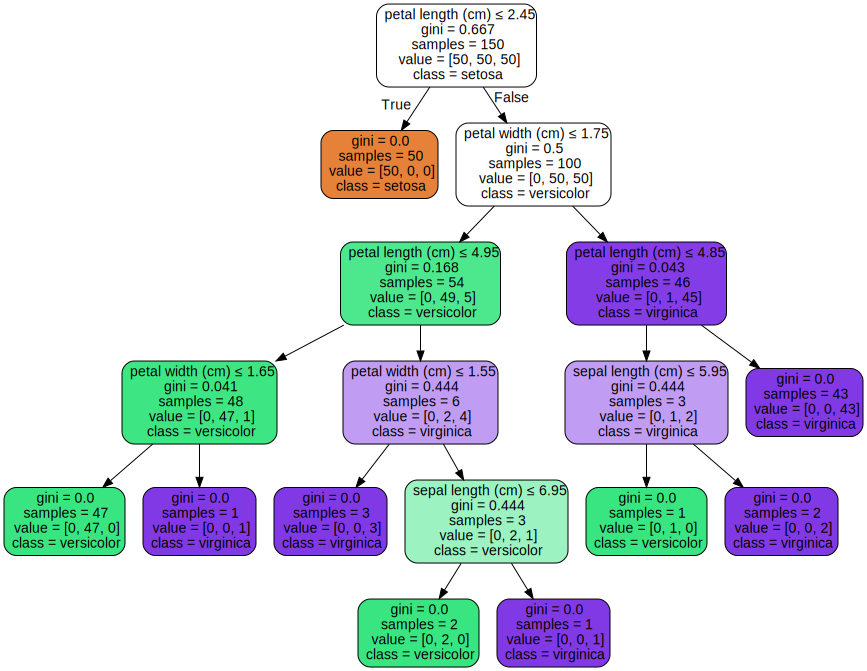

In [44]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [46]:
iris = load_iris()
x_train = iris.data[:120]
x_test = iris.data[120:]
y_train = iris.target[:120]
y_test = iris.target[120:]

model_tree = DecisionTreeClassifier(random_state=10)
model_random = RandomForestClassifier(random_state=10)

model_tree.fit(x_train, y_train)
s1 = model_tree.score(x_test, y_test)

model_random.fit(x_train, y_train)
s2 = model_random.score(x_test, y_test)

print('DecisionTree', s1)
print('RandomForest:', s2)

DecisionTree 0.733333333333
RandomForest: 0.833333333333
